In [17]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn2
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
workingDirectory = '/home/h1bennet/strains_rna/results/K04f_Kupffer_obob_leptin_cohort2_switch_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/leptin_6h_cohort2/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# make folder for figures
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')
    
# make folder for gene lists
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')
    
if not os.path.isdir('./promoter_motif_finding'):
    os.mkdir('./promoter_motif_finding')

# Check qc stats

In [19]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/leptin_6h_cohort2//
./leptin_6h_cohort2_qc/


<Figure size 432x288 with 0 Axes>

In [20]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
mouse_obhet_M_Kupffer_RNA_polyA_veh_6h_rep3_HBENN_l20210429_GTTCCAAT_AATTCTGC,8605074.0,75.0,0.012605,3.987,0.500,38273400.0,34306404.0,3028633.0,0.0,0.0150,0.0031,0.896351,0.9819
mouse_obhet_M_Kupffer_RNA_polyA_veh_6h_rep4_HBENN_l20210429_ACCTTGGC_GGCCTCAT,10248478.0,75.0,0.011636,3.090,0.494,35073237.0,31670623.0,2794570.0,0.0,0.0083,0.0030,0.902985,0.9887
mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep4_HBENN_l20210429_ATATGGAT_CTGTATTA,341565.0,75.0,0.006136,48.846,0.503,18335761.0,16683972.0,1334361.0,0.0,0.0082,0.0030,0.909914,0.9888
mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep5_HBENN_l20210429_AAGATACT_ACTTACAT,3192767.0,75.0,0.010230,8.720,0.494,30744396.0,27840626.0,2220166.0,0.0,0.0127,0.0036,0.905551,0.9837
mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep6_HBENN_l20210429_GCAATGCA_GGAACGTT,8216221.0,75.0,0.010559,3.497,0.497,31785147.0,28733870.0,2449851.0,0.0,0.0090,0.0031,0.904003,0.9879
mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep4_HBENN_l20210429_GCGCAAGC_TCACGCCG,1497438.0,75.0,0.008000,14.534,0.512,24207127.0,21763848.0,1958827.0,0.0,0.0109,0.0025,0.899068,0.9866
mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep5_HBENN_l20210429_GGAGCGTC_GTCCGTGC,6016857.0,75.0,0.009001,4.071,0.494,26878222.0,24494802.0,1894539.0,0.0,0.0077,0.0036,0.911325,0.9887
mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep6_HBENN_l20210429_ATGGCATG_AAGGTACC,7240268.0,75.0,0.009758,3.668,0.497,29549722.0,26555710.0,2427786.0,0.0,0.0094,0.0034,0.898679,0.9872


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [10]:
ids =  ['c57bl6j_kupffer',
        'het_kupffer_veh',
        'obob_kupffer_veh',
        'obob_kupffer_leptin']

In [11]:
c57bl6j_kupffer = ['/home/h1bennet/strains/data/RNA/control_kupffer/C57B6J_Tim4PosKupffer_RNA_C5701C_HBENN_l20201208_TCGTAGTG_AGACTTGG',
                   '/home/h1bennet/strains/data/RNA/control_kupffer/C57B6J_Tim4PosKupffer_RNA_C5701D_HBENN_l20201208_CTACGACA_GAGTCCAA']

het_kupffer_veh = [dataDirectory+'mouse_obhet_M_Kupffer_RNA_polyA_veh_6h_rep3_HBENN_l20210429_GTTCCAAT_AATTCTGC',
                    dataDirectory+'mouse_obhet_M_Kupffer_RNA_polyA_veh_6h_rep4_HBENN_l20210429_ACCTTGGC_GGCCTCAT']

obob_kupffer_veh = [dataDirectory+'mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep5_HBENN_l20210429_GGAGCGTC_GTCCGTGC',
                    dataDirectory+'mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep5_HBENN_l20210429_AAGATACT_ACTTACAT']

obob_kupffer_leptin = [dataDirectory+'mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep6_HBENN_l20210429_ATGGCATG_AAGGTACC',
                       dataDirectory+'mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep6_HBENN_l20210429_GCAATGCA_GGAACGTT']


In [12]:
c57bl6j_kupffer_ids = [i.split('/')[-1].split('_')[3] for i in c57bl6j_kupffer]
het_kupffer_veh_ids = [i.split('/')[-1].split('_')[8] for i in het_kupffer_veh]
obob_kupffer_veh_ids = [i.split('/')[-1].split('_')[8] for i in obob_kupffer_veh]
obob_kupffer_leptin_ids = [i.split('/')[-1].split('_')[8] for i in obob_kupffer_leptin]

In [13]:

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26']
paths = [';'.join(c57bl6j_kupffer),
         ';'.join(het_kupffer_veh),
         ';'.join(obob_kupffer_veh),
         ';'.join(obob_kupffer_leptin)]

short_ids = [';'.join(c57bl6j_kupffer_ids),
             ';'.join(het_kupffer_veh_ids),
             ';'.join(obob_kupffer_veh_ids),
             ';'.join(obob_kupffer_leptin_ids)]

In [14]:
pd.DataFrame([ids,colors,paths,short_ids]).T

,0,1,2,3
0,c57bl6j_kupffer,#bdbdbd,/home/h1bennet/strains/data/RNA/control_kupffe...,C5701C;C5701D
1,het_kupffer_veh,#636363,/home/h1bennet/strains/data/RNA/leptin_6h_coho...,rep3;rep4
2,obob_kupffer_veh,#fc9272,/home/h1bennet/strains/data/RNA/leptin_6h_coho...,rep5;rep5
3,obob_kupffer_leptin,#de2d26,/home/h1bennet/strains/data/RNA/leptin_6h_coho...,rep6;rep6


In [15]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

In [16]:
pd.DataFrame([ids,colors,paths,short_ids]).T.loc[:, 2][3]

'/home/h1bennet/strains/data/RNA/leptin_6h_cohort2/mouse_obob_M_Kupffer_RNA_polyA_veh_6h_rep6_HBENN_l20210429_ATGGCATG_AAGGTACC;/home/h1bennet/strains/data/RNA/leptin_6h_cohort2/mouse_obob_M_Kupffer_RNA_polyA_leptin_6h_rep6_HBENN_l20210429_GCAATGCA_GGAACGTT'

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    alignStats.R ./sampleDef.txt > qcStats.txt
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

# Make hub of merged tag dirs

In [10]:
glob.glob('./expression/mergeTag/*f480*')

['./expression/mergeTag/het_f480high_veh',
 './expression/mergeTag/obob_f480int_leptin',
 './expression/mergeTag/obob_f480int_veh',
 './expression/mergeTag/obob_f480high_leptin',
 './expression/mergeTag/obob_f480high_veh']

    makeMultiWigHub.pl hrb_leptin_6hour_rna_merged mm10 -force -colors \
    189,189,189 \
    99,99,99 \
    252,146,114 \
    222,45,38 \
    158,202,225 \
    49,130,189 \
    -d ./expression/mergeTag/c57bl6j_kupffer \
    ./expression/mergeTag/het_f480high_veh \
    ./expression/mergeTag/obob_f480high_veh \
    ./expression/mergeTag/obob_f480high_leptin \
    ./expression/mergeTag/obob_f480int_veh \
    ./expression/mergeTag/obob_f480int_leptin

### Make sure to check the PCA pdf file for outliers

# Collect genes for writing to metascape

We will also save repeat ids for motif finding

In [11]:
log2fc = 1
padj = 0.05
gene_list_dict = {}
id_list_dict = {}

with o'young's pipeline the first member of the comparison is the denominator (negative log2fc is 'up' in first relative to second)

In [12]:
for i in glob.glob('./differential/*homer.txt'):
    print(i)
    groups = [i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[0],
              i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[1]]
    print('Group 0: '+groups[0])
    print('Group 1: '+groups[1])
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes_g0 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_genes_g1 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    sig_id_g0 = df.RepeatID[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_id_g1 = df.RepeatID[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1
    id_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    id_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1

./differential/obob_f480high_leptin.vs.obob_f480int_veh.scatter.homer.txt
Group 0: obob_f480high_leptin
Group 1: obob_f480int_veh
ge all transcripts (24940, 20)
Diff Gene selected transcripts (8073, 14)
ge selected transcripts (8073, 20)
./differential/c57bl6j_kupffer.vs.obob_f480high_leptin.scatter.homer.txt
Group 0: c57bl6j_kupffer
Group 1: obob_f480high_leptin
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7738, 14)
ge selected transcripts (7738, 20)
./differential/obob_f480high_veh.vs.obob_f480int_veh.scatter.homer.txt
Group 0: obob_f480high_veh
Group 1: obob_f480int_veh
ge all transcripts (24940, 20)
Diff Gene selected transcripts (8125, 14)
ge selected transcripts (8125, 20)
./differential/obob_f480high_veh.vs.het_f480high_veh.scatter.homer.txt
Group 0: obob_f480high_veh
Group 1: het_f480high_veh
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7914, 14)
ge selected transcripts (7914, 20)
./differential/obob_f480high_leptin.vs.het_f480high_veh.scatte

In [13]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

obob_f480high_leptin.vs.obob_f480int_veh_up_obob_f480high_leptin
20 genes
obob_f480high_leptin.vs.obob_f480int_veh_up_obob_f480int_veh
42 genes
c57bl6j_kupffer.vs.obob_f480high_leptin_up_c57bl6j_kupffer
64 genes
c57bl6j_kupffer.vs.obob_f480high_leptin_up_obob_f480high_leptin
66 genes
obob_f480high_veh.vs.obob_f480int_veh_up_obob_f480high_veh
0 genes
obob_f480high_veh.vs.obob_f480int_veh_up_obob_f480int_veh
0 genes
obob_f480high_veh.vs.het_f480high_veh_up_obob_f480high_veh
15 genes
obob_f480high_veh.vs.het_f480high_veh_up_het_f480high_veh
12 genes
obob_f480high_leptin.vs.het_f480high_veh_up_obob_f480high_leptin
46 genes
obob_f480high_leptin.vs.het_f480high_veh_up_het_f480high_veh
105 genes
c57bl6j_kupffer.vs.obob_f480high_veh_up_c57bl6j_kupffer
34 genes
c57bl6j_kupffer.vs.obob_f480high_veh_up_obob_f480high_veh
114 genes
het_f480high_veh.vs.obob_f480int_veh_up_het_f480high_veh
4 genes
het_f480high_veh.vs.obob_f480int_veh_up_obob_f480int_veh
14 genes
obob_f480int_veh.vs.obob_f480high_veh_

In [14]:
for key in id_list_dict.keys():
    print(key)
    print(len(id_list_dict[key]), 'genes')
    with open('./promoter_motif_finding/'+key+'_id_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in id_list_dict[key]:
            f.write(i+'\n')
        f.close()

obob_f480high_leptin.vs.obob_f480int_veh_up_obob_f480high_leptin
20 genes
obob_f480high_leptin.vs.obob_f480int_veh_up_obob_f480int_veh
42 genes
c57bl6j_kupffer.vs.obob_f480high_leptin_up_c57bl6j_kupffer
64 genes
c57bl6j_kupffer.vs.obob_f480high_leptin_up_obob_f480high_leptin
66 genes
obob_f480high_veh.vs.obob_f480int_veh_up_obob_f480high_veh
0 genes
obob_f480high_veh.vs.obob_f480int_veh_up_obob_f480int_veh
0 genes
obob_f480high_veh.vs.het_f480high_veh_up_obob_f480high_veh
15 genes
obob_f480high_veh.vs.het_f480high_veh_up_het_f480high_veh
12 genes
obob_f480high_leptin.vs.het_f480high_veh_up_obob_f480high_leptin
46 genes
obob_f480high_leptin.vs.het_f480high_veh_up_het_f480high_veh
105 genes
c57bl6j_kupffer.vs.obob_f480high_veh_up_c57bl6j_kupffer
34 genes
c57bl6j_kupffer.vs.obob_f480high_veh_up_obob_f480high_veh
114 genes
het_f480high_veh.vs.obob_f480int_veh_up_het_f480high_veh
4 genes
het_f480high_veh.vs.obob_f480int_veh_up_obob_f480int_veh
14 genes
obob_f480int_veh.vs.obob_f480high_veh_

# Single gene plots

In [21]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

#### Aside - make a tpm plot for chris

In [22]:
# chris_tpm = pd.read_csv('./AJ Balb C57 Healthy NASH CCL4.csv', index_col=0)

# chris_tpm_new = chris_tpm.merge(tpm_mat.iloc[:, 2:],
#                                 left_index=True,
#                                 right_index=True,
#                                 how='left')

# chris_tpm_new.to_csv('./AJ Balb C57 Healthy NASH CCL4 obob leptin.csv')

In [23]:
tpm_mat.columns

Index(['c57bl6j_kupffer_C5701C', 'c57bl6j_kupffer_C5701D',
       'het_kupffer_veh_rep3', 'het_kupffer_veh_rep4', 'obob_kupffer_veh_rep5',
       'obob_kupffer_veh_rep5.1', 'obob_kupffer_leptin_rep6',
       'obob_kupffer_leptin_rep6.1'],
      dtype='object')

In [24]:
groups = [[0,1],
          [2,3],
          [4,5],
          [6,7]]

group_labels = ['c57bl6j_kupffer',
                'het_kupffer_veh',
                'obob_kupffer_veh',
                'obob_kupffer_leptin']

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26']

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

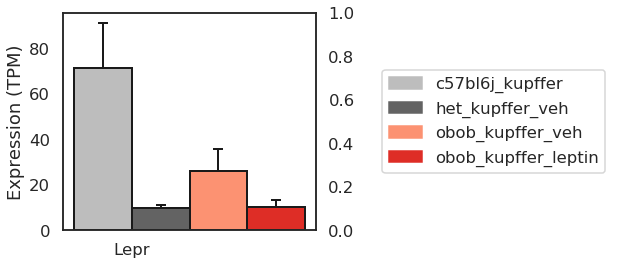

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

gene_list_bar_plot(['Lepr'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width=0.15,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

Plot with F480Hi only

In [19]:
groups = [[0,1],
          [2,3],
          [4,5,6],
          [7,8]]

group_labels = ['c57bl6j_kupffer',
                'het_f480high_veh',
                'obob_f480high_veh',
                'obob_f480high_leptin']

colors = ['#bdbdbd',
          '#636363',
          '#fc9272',
          '#de2d26']

# make legend
legend_elements = []
for lab, col in  zip(group_labels, colors):
    legend_elements.append(Patch(label=lab, color=col))

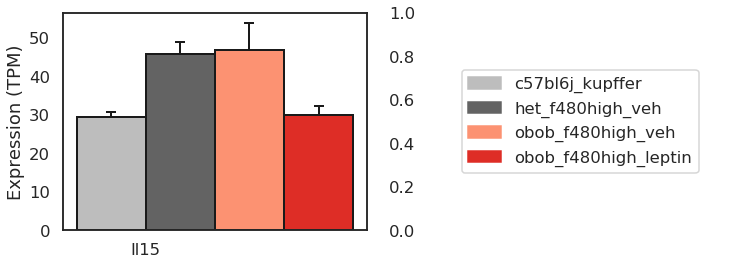

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

gene_list_bar_plot(['Il15'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width = 0.2,
                   ax=axs[0])

axs[0].get_legend().remove()

axs[1].legend(handles=legend_elements, loc='center');
axs[1].spines['top'].set_visible(False);
axs[1].spines['right'].set_visible(False);
axs[1].spines['left'].set_visible(False);
axs[1].spines['bottom'].set_visible(False);
axs[1].set_xticklabels('');

# Look at motif enrichment at promoters of differential genes.

In [25]:
if not os.path.isdir('./promoter_motif_finding'):
    os.mkdir('./promoter_motif_finding')

Test out motif finding

    findMotifs.pl \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_1_pval_0.05.txt mouse \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_1_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_0_pval_0.05.txt mouse \ 
    ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin_id_fc_0_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl \
        ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_1_pval_0.05.txt mouse \
        ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_1_pval_0.05_motifs/ -len 8,10,12
    
        findMotifs.pl ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_0_pval_0.05.txt mouse ./promoter_motif_finding/obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh_id_fc_0_pval_0.05_motifs/ -len 8,10,12

Read in known motif results

In [26]:
known_motif_pval_dict = {}
for f in np.sort(glob.glob('./promoter_motif_finding/*/knownResults.txt')):
    # read in signifance values using pandas
    frame = pd.read_csv(f, sep='\t', index_col=0)
    
    # remove duplicates
    frame = frame[~frame.index.duplicated(keep='first')]
    pval = frame.iloc[:, 2]
    
    # extract name of sample
    sample = f.split('/')[2]
    
    # store in dict
    known_motif_pval_dict[sample] = pval    
    
# create data frame
known_motif_pval_frame = pd.DataFrame(known_motif_pval_dict)

# sort by average p value
known_motif_pval_frame = known_motif_pval_frame.reindex(known_motif_pval_frame.mean(axis=1).sort_values().index.tolist())

known_motif_pval_frame.to_csv('./homer_known_motifs_distal_log.txt', sep='\t')

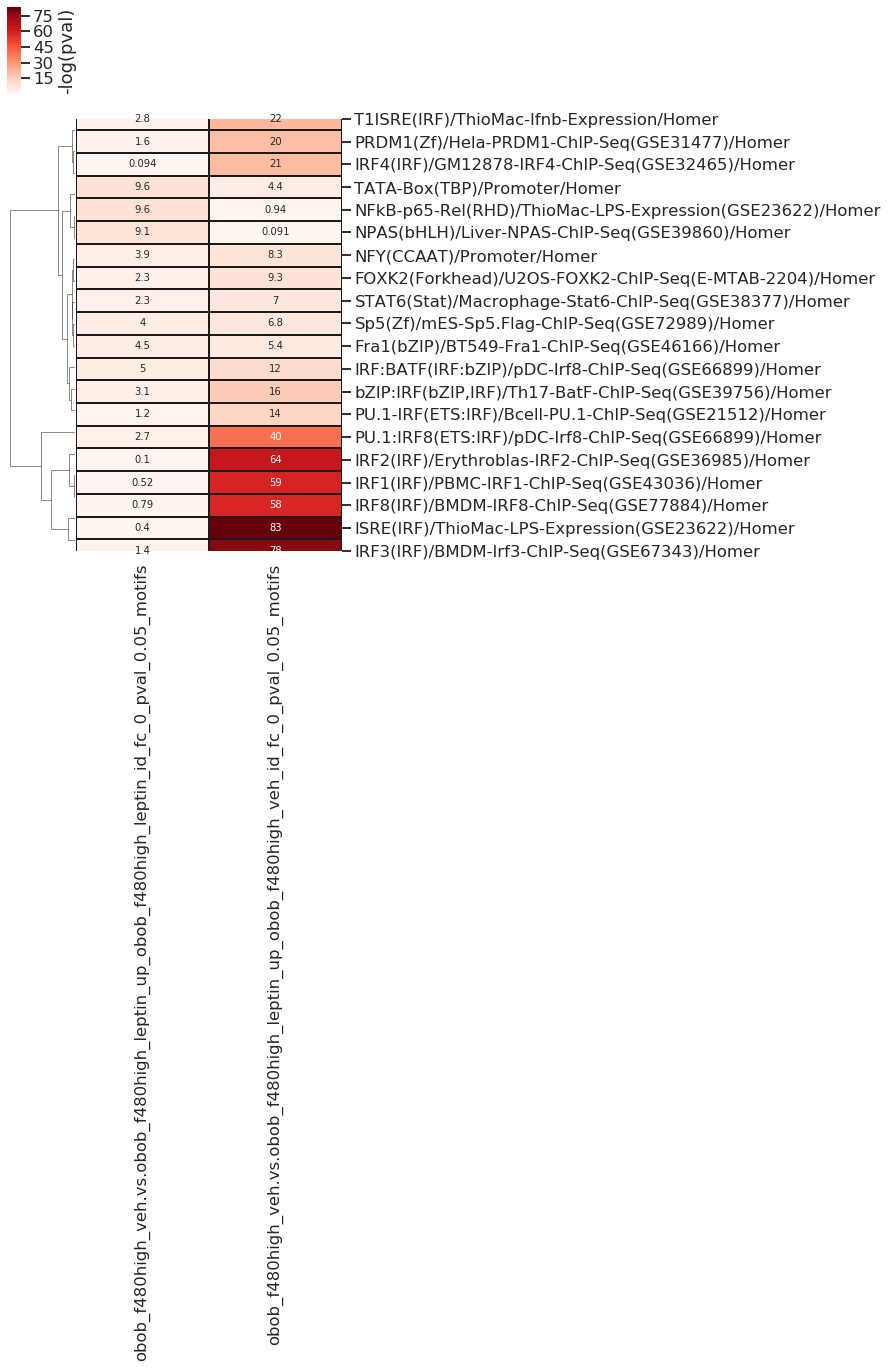

In [27]:
tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('fc_0_')]

# sort by new mean
tmp_frame = tmp_frame.reindex(tmp_frame.mean(axis=1).sort_values(ascending=True).index.tolist())

sns.clustermap(
    -tmp_frame.loc[(tmp_frame <=-5).any(axis=1), :].head(20),
    cmap='Reds',
    linewidths=1,
    linecolor='k',
    annot=True,
    col_cluster=False,
    cbar_kws={'label': '-log(pval)'},
    figsize=(6,10))

# Look at overlap with strain specific genes.

In [36]:
# make dict to hold lists
strain_spec_lists = {}
# read in lists of strain specific genes
for i in glob.glob('/home/h1bennet/strains_rna/results/K00_Strains_Control_Kupffer_RNA/gene_lists/*txt'):
    with open(i, 'r') as f:
        listname = i.split('/')[-1].split('_kupffer')[0]
        genelist = [i.strip() for i in f.readlines()[1:]]
        strain_spec_lists[listname] = genelist

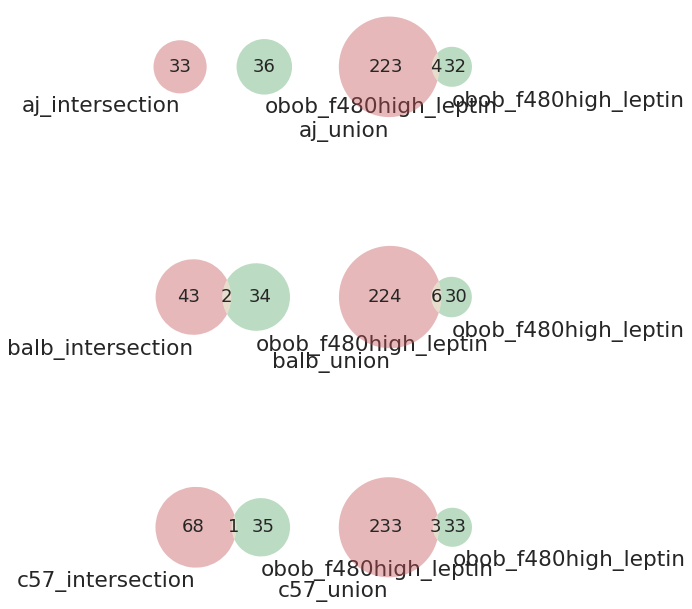

In [37]:
lep_list = 'obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin'

fig, axs = plt.subplots(3, 2, figsize=(6,12))

for i, ax in zip(np.sort(list(strain_spec_lists.keys())), axs.flat):
    venn2([set(strain_spec_lists[i]),
          set(gene_list_dict[lep_list])],
          set_labels=(i, lep_list.split('_up_')[-1]),
          ax=ax)

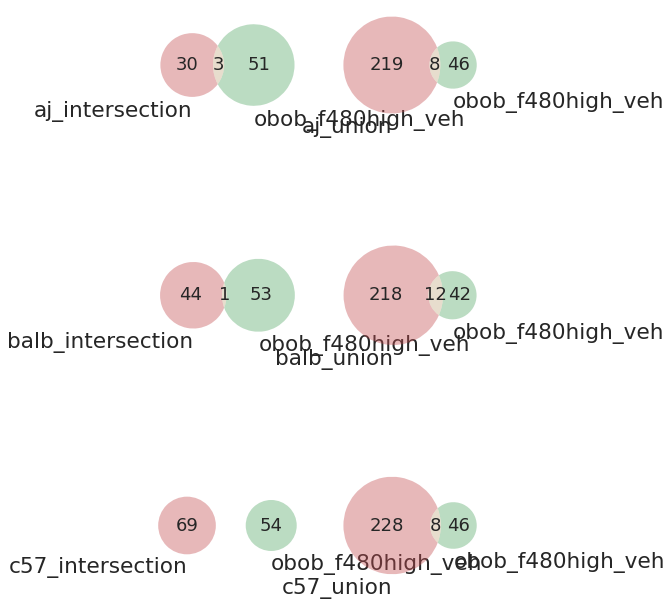

In [38]:
lep_list = 'obob_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_veh'

fig, axs = plt.subplots(3, 2, figsize=(6,12))

for i, ax in zip(np.sort(list(strain_spec_lists.keys())), axs.flat):
    venn2([set(strain_spec_lists[i]),
          set(gene_list_dict[lep_list])],
          set_labels=(i, lep_list.split('_up_')[-1]),
          ax=ax)

In [45]:
set(gene_list_dict[lep_list]).intersection(strain_spec_lists['c57_intersection'])

set()

In [46]:
set(gene_list_dict[lep_list]).intersection(strain_spec_lists['c57_union'])

{'Cfb', 'Gbp2b', 'H2-Eb1', 'Ifi204', 'Ifi205', 'Ly6a', 'Mndal', 'Plac8'}

# Take a look at restoration of ob/het phenotype

Easier to rextract the gene_list_dict here for now

In [41]:
log2fc = 1
padj = 0.05
gene_list_dict = {}
id_list_dict = {}

for i in glob.glob('./differential/*homer.txt'):
    # print(i)
    groups = [i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[0],
              i.split('/')[-1].replace('.scatter.homer.txt', '').split('.vs.')[1]]
    # print('Group 0: '+groups[0])
    # print('Group 1: '+groups[1])
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes_g0 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
    sig_genes_g1 = df.index[(df['padj'] < padj) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[0])] = sig_genes_g0
    gene_list_dict[i.split('/')[-1].replace('.scatter.homer.txt', '_up_'+groups[1])] = sig_genes_g1

ge all transcripts (24940, 20)
Diff Gene selected transcripts (8073, 14)
ge selected transcripts (8073, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7738, 14)
ge selected transcripts (7738, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (8125, 14)
ge selected transcripts (8125, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7914, 14)
ge selected transcripts (7914, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7754, 14)
ge selected transcripts (7754, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7924, 14)
ge selected transcripts (7924, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7913, 14)
ge selected transcripts (7913, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (8125, 14)
ge selected transcripts (8125, 20)
ge all transcripts (24940, 20)
Diff Gene selected transcripts (7913, 14)
ge selected transcripts (7913, 20)
ge all transcripts (24940, 2

In [42]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [43]:
select_samples = ['het_f480high_veh_rep1',
                  'het_f480high_veh_rep2',
                  'obob_f480high_veh_rep1',
                  'obob_f480high_veh_rep2',
                  'obob_f480high_veh_rep3',
                  'obob_f480high_leptin_rep1',
                  'obob_f480high_leptin_rep2']

In [44]:
genes = gene_list_dict['het_f480high_veh.vs.obob_f480high_veh_up_obob_f480high_veh'] + \
gene_list_dict['het_f480high_veh.vs.obob_f480high_veh_up_het_f480high_veh']

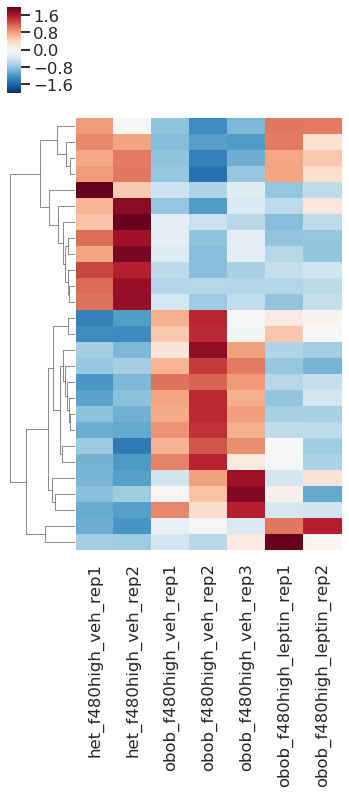

In [45]:
hm = sns.clustermap(
    tpm_mat.loc[genes, select_samples],
    z_score=0,
    col_cluster=False,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    yticklabels=0,
    figsize=(6,10))

### Clearly there are genes that are no longer differential, lets try and come up with a systematic way of finding them.
The obvious first way would be to take the difference of the obob_veh upregulated genes and obob_leptin upregulated genes relative to c57, things that are no longer upregulated in the leptin treated comparison would be of interest.

In [47]:
temp_list = set(gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_veh_up_c57bl6j_kupffer']).difference(
                gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_leptin_up_c57bl6j_kupffer'])

with open('./gene_lists/obob_vs_c57_f480high_repressed_genes_rescued_leptin_p05_fc1.txt', 'w') as f:
    f.write('Gene\n')
    for i in temp_list:
        f.write(i+'\n')
    
    f.close()
    
temp_list = set(gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_veh_up_obob_f480high_veh']).difference(
                gene_list_dict['c57bl6j_kupffer.vs.obob_f480high_leptin_up_obob_f480high_leptin'])

with open('./gene_lists/obob_vs_c57_f480high_induced_genes_rescued_leptin_p05_fc1.txt', 'w') as f:
    f.write('Gene\n')
    for i in temp_list:
        f.write(i+'\n')
    
    f.close()

Do similar exercise with the hets

In [48]:
temp_list = set(gene_list_dict['het_f480high_veh.vs.obob_f480high_veh_up_het_f480high_veh']).difference(
                gene_list_dict['het_f480high_veh.vs.obob_f480high_leptin_up_het_f480high_veh'])

with open('./gene_lists/obob_vs_het_f480high_repressed_genes_rescued_leptin_p05_fc1.txt', 'w') as f:
    f.write('Gene\n')
    for i in temp_list:
        f.write(i+'\n')
    
    f.close()
    
temp_list = set(gene_list_dict['het_f480high_veh.vs.obob_f480high_veh_up_obob_f480high_veh']).difference(
                gene_list_dict['het_f480high_veh.vs.obob_f480high_leptin_up_obob_f480high_leptin'])

with open('./gene_lists/obob_vs_het_f480high_induced_genes_rescued_leptin_p05_fc1.txt', 'w') as f:
    f.write('Gene\n')
    for i in temp_list:
        f.write(i+'\n')
    
    f.close()

# Plot potential nichenet ligands

In [16]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']